# Tour dos pacotes científicos principais

Existem três pacotes campeões na área científica.

* `numpy`, para computação numérica, possui *arrays* que são muito mais rápidos que listas em Python, e uma série de funções para manipular esses *arrays*. [docs](https://numpy.org/doc/stable/) e [livro recomendado](http://web.mit.edu/dvp/Public/numpybook.pdf)
* `pandas`, para o carregamento, processamento, limpeza, filtragem, agregação e exportação de dados. [docs](https://pandas.pydata.org/pandas-docs/stable/index.html)
* `matplotlib`, para a criação de gráficos. [docs](https://matplotlib.org/)
* `scipy`, com funções específicas para a área científica. [docs](https://docs.scipy.org/doc/scipy/index.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

Cada um desses pacotes são um universo e nunca conseguirei fazer juz à todos, especialmente em um único capítulo. Eu começarei descrevendo cada um aos poucos, depois começarei a juntar as peças e por fim tentarei mostrar problemas mais completos.

(sec:basicos_np_1)=
## Básicos de `numpy` Parte 1

[Veja também a seção para iniciantes da documentação](https://numpy.org/doc/stable/user/absolute_beginners.html)

Listas em Python podem conter qualquer objetos de tipo. Números, strings, objetos complexos, qualquer coisa, de qualquer tamanho. Para isso, o interpretador precisa de uma série de abstrações que permitam essa flexibilidade, e isso traz lentidão. No centro de `numpy` temos os *arrays* como análogos a listas, mas:

* *arrays* precisam ser somente de um mesmo tipo, e esses tipos nem sempre são idênticos ao existentes em Python.
* *arrays* precisam de um tamanho fixo.

Essa rigidez traz algumas vantagens

* Flexibilidade no formato: *arrays* possuem um *buffer*, um bloco contíguo de memória, contendo informação (bytes), e uma descrição desses dados, como o número de linhas, colunas, tipo do dado. Assim, `numpy` consegue acessar qualquer elemento com muita rapidez, com um simples cálculo de posição. Além disso, quando queremos transformar um *array*, com uma transposta ou uma alteração no número de linhas ou colunas, não precisamos alterar esse bloco de memória, somente os cálculos para encontrar os elementos.
* Expressividade: operações em todos os elementos, algo muito comum, podem ser feitas como se um *array* fosse um escalar qualquer, sem termos que nos preocupar com loops ao longo dos elementos.
* Vetorização: quando aplicamos operações em *arrays*, o processamento é transferido para a linguagem C, onde a velocidade de execução é mais rápida.

Logo, utilizar *arrays* nos permite ter código rápido e expressivo. 

Para criar um *array*, podemos utilizar a função `np.array` com um iterável.

In [2]:
arr = np.array([1, 2, 3, 4, 5])
arr

array([1, 2, 3, 4, 5])

Podemos também utilizar várias funções que geram *arrays*, como:

* `np.arange`, que é similar ao embutido `range`, mas onde podemos ter passos não inteiros

In [3]:
print(np.arange(10), np.arange(1, 10, 1), np.arange(2, 10, 0.375), sep="\n")

[0 1 2 3 4 5 6 7 8 9]
[1 2 3 4 5 6 7 8 9]
[2.    2.375 2.75  3.125 3.5   3.875 4.25  4.625 5.    5.375 5.75  6.125
 6.5   6.875 7.25  7.625 8.    8.375 8.75  9.125 9.5   9.875]


* `np.linspace`, que recebe um valor de início, fim e um número de pontos e retorna um *array* onde esses pontos são espaçados igualmente na escala linear. Importante realçar que neste caso o ponto final é incluído por padrão (*kwarg* `endpoint`). Logo, nestes exemplos o número de pontos pode *parecer* errado, m se você contá-los na mão verá todos tem o tamanho correto.

In [4]:
print(np.linspace(1, 10, num=10), np.linspace(1, 10, num=19), np.linspace(50, 100, num=6))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10. ] [ 50.  60.  70.  80.  90. 100.]


* `np.logspace`, que é similar a `np.linspace`, mas os dados são espaçados igualmente na escala log. Por padrão a base é 10, mas pode ser especificada com o *kwarg* `base`. Os valores fornecidos são a *potência* em que a base é elevada, então se quiser começar de 10, o valor de `start` é 1.

In [5]:
print(np.logspace(0, 3, num=4), np.logspace(-3, 3, num=7))

[   1.   10.  100. 1000.] [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


* `np.geomspace` é similar a `np.logspace`, mas os pontos iniciais e finais são fornecidos diretamente, sem precisar colocar a base e expoente.

In [6]:
print(np.geomspace(1, 1000, num=4), np.geomspace(1e-3, 1000, num=7))

[   1.   10.  100. 1000.] [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


* `np.ones`, que gera uma *array* contendo somente uns do tamanho especificado.

In [7]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

* `np.zeros` faz o mesmo, mas contendo somente zeros

In [8]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

* `np.ones_like` e `np.zeros_like` retornam *arrays* cheias de zeros ou uns com o mesmo formato de outra array

In [9]:
temp = np.array([1, 2, 3, 4, 5])
print(np.ones_like(temp), np.zeros_like(temp))

[1 1 1 1 1] [0 0 0 0 0]


Até agora todas as estruturas mostradas são 0-dimensionais. Não são como vetores linha ou coluna, são só sequências. Isso pode ser acessado pela propriedade `.shape`. A propriedade `.size` contém o número total de elementos.

In [10]:
temp.shape, temp.size

((5,), 5)

Podemos criar *arrays* multidimensionais com várias das funções anteriores.

In [11]:
print(
    np.array([[1, 2, 3], [4, 5, 6]]),
    np.array([[1], [2], [3], [4], [5], [6]]),
    np.ones((2, 3)),
    np.zeros((3, 2)),
    sep="\n\n",
)

[[1 2 3]
 [4 5 6]]

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]

[[1. 1. 1.]
 [1. 1. 1.]]

[[0. 0.]
 [0. 0.]
 [0. 0.]]


E podemos alterar as dimensões de *arrays* com `reshape` e o número de linhas e colunas, desde que os números de elementos sejam compatíveis.

In [12]:
arr_0d = np.arange(1, 7, 1)
arr_1d_lin = arr_0d.reshape(1, 6)
arr_1d_col = arr_0d.reshape(6, 1)
arr_2d = arr_0d.reshape(2, 3)
arr_3d = arr_0d.reshape(1, 3, 2)
print(
    arr_0d,
    arr_0d.shape,
    arr_0d.size,
    "\n\n",
    arr_1d_lin,
    arr_1d_lin.shape,
    arr_1d_lin.size,
    "\n\n",
    arr_1d_col,
    arr_1d_col.shape,
    arr_1d_col.size,
    "\n\n",
    arr_2d,
    arr_2d.shape,
    arr_2d.size,
    "\n\n",
    arr_3d,
    arr_3d.shape,
    arr_3d.size,
)

[1 2 3 4 5 6] (6,) 6 

 [[1 2 3 4 5 6]] (1, 6) 6 

 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]] (6, 1) 6 

 [[1 2 3]
 [4 5 6]] (2, 3) 6 

 [[[1 2]
  [3 4]
  [5 6]]] (1, 3, 2) 6


Por praticidade, uma dimensão pode ser especificada como `-1`, deixando que seu valor seja calculado pelos outros valores.

In [13]:
arr_0d.reshape(-1, 3)

array([[1, 2, 3],
       [4, 5, 6]])

Se quisermos acessar um elemento, podemos fazer com a notação de colchetes. Convenientemente, ao invés de termos que encadear colchetes, podemos fornecer o índice, ou slices, separados por vírgula.

In [14]:
loc = np.arange(1, 10, 1).reshape(-1, 3)
print(
    loc,
    loc[1, 1],  # segundo linha, segunda coluna
    loc[:, 0],  # "todas as linhas, primeira coluna"
    loc[1, :],  # "segunda linha, todas as colunas"
    loc[1:4, 1:4],  # "segunda linha até a próxima, segunda coluna até a próxima"
    loc[::2, ::2],  # "todas linhas de 2 em duas, todas as colunas de 2 em duas"
    sep="\n\n",
)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

5

[1 4 7]

[4 5 6]

[[5 6]
 [8 9]]

[[1 3]
 [7 9]]


Note que nessas operações, as dimensões dos *arrays* obtidos variam. Se especificamos um único índice, temos um número. Se especificamos uma linha ou coluna, temos *arrays* 0d, e somente se especificarmos algo que precisa ser 2d que teremos resultados 2d. Podemos utilizar `np.newaxis` na posição do eixo que desejamos adicionar, para alterar esse comportamento.

In [15]:
loc = np.arange(1, 10, 1).reshape(-1, 3)
print(
    loc,
    loc[1, 1, np.newaxis],  # segundo linha, segunda coluna, criando um eixo
    loc[np.newaxis, :, 0],  # "todas as linhas, primeira coluna, com dimensão no eixo 0 (linhas)"
    loc[
        1, :, np.newaxis
    ],  # "segunda linha, todas as colunas, com dimensão extra no eixo 2 (decai para colunas)"
    sep="\n\n",
)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[5]

[[1 4 7]]

[[4]
 [5]
 [6]]


Para alterar o valor de um elemento, podemos utilizar a notação já esperada de `arr[idx] = val`. Nos índices podemos colocar slices também para transformarmos mais de uma posição de cada vez. O número de elementos precisa ser apropriado, senão um `ValueError` será lançado.

In [16]:
loc = np.arange(1, 10, 1).reshape(-1, 3)
print(loc, "\n\n")
loc[1, 2] = 100
print(loc, "\n\n")
loc[:, 0] = (-1, -2, -3)
print(loc)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 


[[  1   2   3]
 [  4   5 100]
 [  7   8   9]] 


[[ -1   2   3]
 [ -2   5 100]
 [ -3   8   9]]


Note que o seccionamento de *arrays* returna uma visão do *array* original. Isso significa que mudanças em um podem afetar o outro. Para contornar isso podemos utilizar `.copy`. 

In [17]:
loc = np.arange(1, 10, 1).reshape(-1, 3)
view1 = loc[1:, 1:]
print(loc, "\n\n", view1, "\n\n")

loc[2, 2] = 100
print(loc, "\n\n", view1, "\n\n")

view1[0, 0] = 500
print(loc, "\n\n", view1)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

 [[5 6]
 [8 9]] 


[[  1   2   3]
 [  4   5   6]
 [  7   8 100]] 

 [[  5   6]
 [  8 100]] 


[[  1   2   3]
 [  4 500   6]
 [  7   8 100]] 

 [[500   6]
 [  8 100]]


Quando temos duas *arrays* com o mesmo tamanho, podemos fazer operações aritméticas entre elas elemento-a-elemento. Se um dos argumentos for um escalar, algo chamado *broadcasting* ocorre, e esse escalar é "transformado" em um *array* do tamanho apropriado. Essa flexibilidade lhe permite, inclusive, passar para funções escalares e *arrays* e o comportamento deve ser compatível.

Nos exemplos a seguir, irei criar alguns *arrays* utilizando *broadcasting*, e também irei realizar operações entre *arrays* de mesmo tamanho. Utilizarei também as funções `np.sin`, `np.cos`, `np.sqrt` e `np.exp` e a constante `np.pi` para realizar alguns cálculos. Para encontrar o valor do pico, utilizarei `np.argmax`, que retorna o *índice* onde o valor máximo do *array* ocorre. Isso é necessário para que encontre o valor de `x` correspondente ao máximo em `y`. Análogos a isso temos `np.max`, `np.min` e `np.argmin`.

In [18]:
xx1 = np.linspace(-10, 10)
yy_linear = 5 * xx1 - 10
yy_parabola = -(xx1**2) + 5 * xx1 + 10
yy_terceiro_grau = 5 / 40 * xx1**3 - xx1**2 + 5 * xx1 + 10

xx2 = np.linspace(-np.pi, np.pi)
yy_per1 = np.sin(xx2)
yy_per2 = np.cos(xx2 + np.pi / 2)
yy_canc = yy_per1 + yy_per2
yy_tan = np.tan(xx2)


def gauss(x, sigma, mu):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x - mu) ** 2 / sigma**2)


sigma, mu = 1, 0.5
xx3 = np.linspace(-4, 4)
yy_gauss_1 = gauss(xx3, sigma, mu)
yy_gauss_1_max = gauss(mu, sigma, mu)
yy_gauss_2 = gauss(xx3, sigma, mu - 1)
yy_gauss_3 = gauss(xx3, sigma, mu + 1)
yy_gauss_todos = yy_gauss_1 + yy_gauss_2 + yy_gauss_3
gauss_todos_max_idx = np.argmax(yy_gauss_todos)
yy_gauss_todos_max = yy_gauss_todos[gauss_todos_max_idx]
xx_gauss_todos_max = xx3[gauss_todos_max_idx]


def cross_model(GP, eta_0, eta_inf, k, n):
    return eta_inf + (eta_0 - eta_inf) / (1 + (GP / k) ** n)


xx4 = np.geomspace(1e-3, 1e3)
yy_cross = cross_model(xx4, 50, 0.01, 1, 0.85)

Para mostrar como a vetorização auxilia na velocidade, veja as duas funções a seguir. Uma itera sobre um array e outra vetoriza a operação. Ambas computam a mesma coisa, mas a diferença é de 3 ordens de grandeza na velocidade.

In [19]:
def lento():
    a = np.ones(100000)
    for i in range(a.size):
        a[i] *= 5


def rapido():
    a = np.ones(100000)
    a *= 5

In [20]:
%timeit lento()

18.3 ms ± 507 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%timeit rapido()

25.3 µs ± 239 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


```{warning} Atenção
**Não misture funções da biblioteca `math` com `numpy`**, a performance será muito menor.
```

Antes de prosseguir, vamos visualizar essas funções que criamos com `matplotlib`.

(sec:basicos_mpl_1)=
## Básicos de `matplotlib` Parte 1

Agora que temos alguns *arrays*, seria interessante visualizarmos o que construimos. Podemos utilizar `matplotlib` para isso. Essa biblioteca foi criada como um paralelo às funções de plotagem presentes em Matlab, e isso trouxe vantagens e desvantagens. Primeiro, popularizou bastante a biblioteca, e ela é praticamente o padrão em Python para qualquer tipo de visualização estática. Os gráficos possuem opções para modificar praticamente todos os seus aspectos, permitindo você ajustar os gráficos exatamente da maneira que você quer. Por outro lado, os paradigmas empregados em `matplotlib` pode tornar alguns tipos de tarefas um tanto tediosas e inflexíveis. O `ggplot2` da linguagem R (análogo em Python: `plotnine`), e o pacote `altair` de Python, utilizam outro paradigma, e possuem certas vantagens. Mas, no final das contas, vai um pouco da preferência e familiaridade de cada um.

`matplotlib` por si só é raramente utilizado, e controla aspectos mais fundamentais da criação dos gráficos, como opções de estilo e os objetos utilizados para os desenhos em si. `matplotlib.pyplot` é uma interface procedural exposta que facilita a criação de gráficos. O paradigma dessa interface é imperativo, i.e., os comandos se referem sempre ao *objeto atual*. Então se você quer criar, por exemplo, duas figuras, você deve *ativar* uma figura e depois mandar os comandos de plotar e modificação de aparência e depois repetir o processo com outra figura. Essa interface não é recomendada para qualquer trabalho mais complexo, mas é plenamente utilizável para visualizações rápidas.

As funções em `pyplot` possuem uma quantidade *enorme* de parâmetros opcionais, e é impossível especificar todos aqui, sem ser redundante. Por isso irei mencionar algumas opções de vez em quando.

Para ilustrar os *arrays* que criamos anteriormente, vamos primeiro criar figuras com [`plt.figure()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) e plotar com [`plt.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). A primeira função não precisa de argumentos, mas aceita um identificador[^1], um tamanho da figura em polegadas no formato `(largura, altura)`, uma resolução em *dpi* (*dots per inch*), e algumas outras opções menos utilizadas[^2].

[^1]: número que pode ser utilizado para "re-chamar" a figura depois, e aumenta sozinho começando de 1.

[^2]: Se você quiser uma figura com um tamanho em pixels específico (p.e. 1080p = 1920x1080), fixe o tamanho da figura (múltiplo de 16x9) e calcule o *dpi* para atingir a resolução. Então uma figura de tamanho `(4, 2.25)` precisa de *dpi* igual a 480 (1920 / 4). Você pode também fixar o *dpi* e encontrar o tamanho dividindo a resolução em pixels pelo *dpi* fixado, então uma figura com 600 *dpi* e resolução 1920x1080 teria o tamanho de 1920/600 x 1080/600 = `(3.2, 1.8)`.

Pode ser estranho especificar um tamanho e resolução em polegadas, mas isso é muito utilizado em publicação e em meios acadêmicos. Muitas revistas pedem figuras coloridas com resolução de 600 dpi e figuras em preto e branco com 1200 dpi. Além disso, o tamanho de uma figura afeta a escala dos elementos. Um erro comum de principiante é aumentar o tamanho da figura para melhorar a resolução, mas isso somente agrava o problema. Se você aumenta o tamanho para o dobro, o tamanho do texto irá cair porque o tamanho da fonte ficou constante[^3]. Neste caso, aumente só a resolução.

Se você estiver fazendo figuras para um artigo, veja nas especificações da revista sobre o tamanho esperado para figuras e o tamanho da fonte das mesmas e fixe isso em todos os seus projetos para esse artigo. Note que algumas figuras podem ocupar duas colunas, ou uma página inteira, então tome cuidado.

[^3]: O tamanho de fontes geralmente é dado em pontos (Arial 12, por exemplo), e um ponto é 1/72 de uma polegada.

O comando para plotar, mais comum, é `plt.plot`. A sintaxe é um tanto complexa e flexível porque precisa de certa compatibilidade com Matlab. Essa função precisa de somente um argumento, os valores de `y`, e nesse caso os valores de `x` serão dados pelo número do ponto (igual a `range`). Mais comum é fornecer tanto o valor de `x` quanto de `y`, e é importante notar que ambos precisam ser *exatamente* o mesmo número de elementos. Não precisam ser *arrays*, podem ser listas, tuplas, qualquer iterável. Depois podemos fornecer uma string contendo a formatação dos elementos, mas eu prefiro especificar essa formatação nos argumentos opcionais.

Por padrão serão criadas linhas, sem marcadores. Comandos sucessivos de `plt.plot` irão gerar linhas, sem marcadores[^4], de cores diferentes, seguindo um [ciclo](https://matplotlib.org/stable/gallery/color/color_cycle_default.html#colors-in-the-default-property-cycle). O padrão são as cores da paleta [Tableau](https://matplotlib.org/stable/gallery/color/named_colors.html#tableau-palette).

[^4]: Se você especificar *arrays* com 1 elemento e não especificar o marcador, não irá ver nada, pois as linhas só existem entre os marcadores. Outro erro comum de principiante. 

Podemos especificar estilos de linha (contínua, hachurada, etc) com `linestyle=` ou `ls=`. Os tipos são `-`, `--`, `-.`, `:`,  para linha contínua, tracejada, traço e ponto e pontilhada.

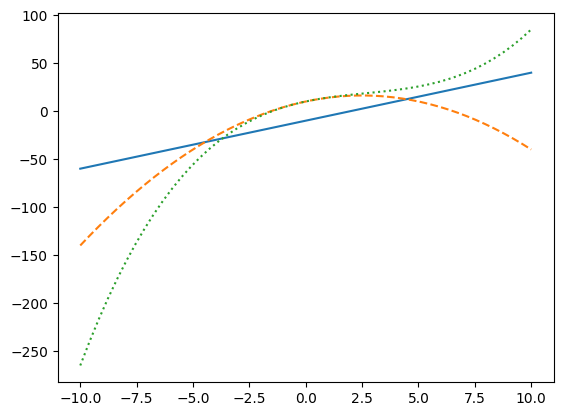

In [22]:
plt.figure()
plt.plot(xx1, yy_linear)
plt.plot(xx1, yy_parabola, ls="--")
plt.plot(xx1, yy_terceiro_grau, ls=":")

Podemos especificar os marcadores com `marker=`, fornecendo uma string com o especificador. Os mais comuns são `'s'` para um quadrado (*square*), `'o'` para um círculo, `'*'` para uma estrela, `'v'` `'>'` `'<'^` `'^'` para triângulos, `'p'` para um pentágono, e por aí vai.

Se quiser especificar um nome a uma linha, utilize `label=` em `plt.plot` e depois chame a função `plt.legend()` para criar a caixa da legenda na figura.

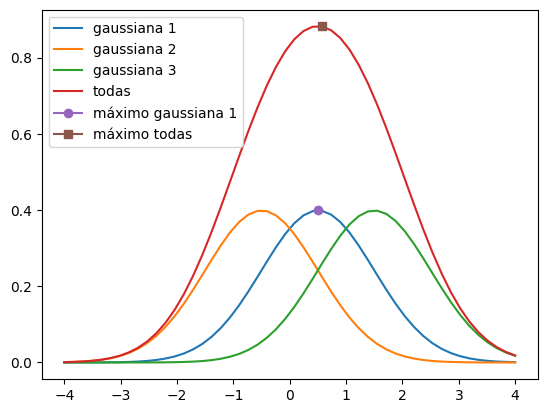

In [23]:
plt.figure()
plt.plot(xx3, yy_gauss_1, label="gaussiana 1")
plt.plot(xx3, yy_gauss_2, label="gaussiana 2")
plt.plot(xx3, yy_gauss_3, label="gaussiana 3")
plt.plot(xx3, yy_gauss_todos, label="todas")
plt.plot(mu, yy_gauss_1_max, marker="o", label="máximo gaussiana 1")
plt.plot(xx_gauss_todos_max, yy_gauss_todos_max, marker="s", label="máximo todas")
plt.legend()

Note que, na legenda, `máximo gaussiana 1` possui um marcador com uma linha como seu símbolo. Isso é porque não especificamos que a linha deveria ter tamanho 0 (efetivamente removendo-a). Note também que os máximos aparentam estar um pouquinho deslocado, e isso se deve à limitação da precisão dos pontos na curva, cuja rugosidade pode ser notada, especialmente no topo. Além disso, resista a tentação de chamar `plt.scatter` para criar esse tipo de notação (curvas sem linhas) porque o propósito dessa função é ligeiramente diferente.

Podemos especificar a cor tanto da linha quanto do marcador com `color=` ou `c=`, e o valor sendo um [nome](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py), uma cor do ciclo (começando com `'C0'`), uma string com o código hexadecimal da cor (`#XXXXXX`) ou uma cor de 1 letra (`'b'` para azul, `'g'` para verde, etc). Se quiser especificar a cor dos marcadores, utilize `markerfacecolor=` ou `mfc=` para mudar a cor do centro e `markeredgecolor` ou `mec=` para mudar a cor da borda. A espessura da linha e do contorno do marcador são especificadas com `linewidth=` ou `lw=` e `markeredgewidth=` ou `mew=`. O tamanho do marcador é especificado com `markersize=` ou `ms=`.

Para nomear os eixos, você pode utilizar `plt.xlabel` e `plt.ylabel`. O título de uma figura é modificado com `plt.title`. Em todas as partes que envolvem texto, você pode utilizar notação $\LaTeX$ para expandir as capacidades tipográficas e colocar equações, envolvendo os comandos em `$`. Não se esqueça de utilizar uma *raw string* para evitar problemas com caracteres de escape e comandos de $\LaTeX$.

Se quiser mudar a escala de um eixo, utilize `plt.xscale` ou `plt.yscale`, junto com `'linear'` para escala linear e `'log'` para escala logaritmica, e outras.

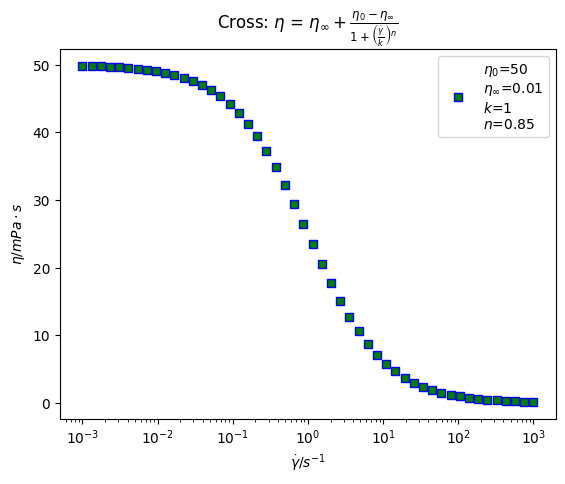

In [24]:
plt.figure()
plt.plot(
    xx4,
    yy_cross,
    lw=0,
    marker="s",
    mec="b",
    mfc="g",
    label="\n".join([r"$\eta_0$=50", r"$\eta_\infty$=0.01", r"$k$=1", r"$n$=0.85"]),
)
plt.xlabel(r"$\dot{\gamma} / s^{-1}$")
plt.ylabel(r"$\eta / mPa\cdot s$")
plt.xscale("log")
plt.title(
    r"Cross: $\eta$ = $\eta_\infty + \frac{\eta_0 - \eta_\infty}{1 + \left( \frac{\dot{\gamma}}{k} \right)^n }$"
)
plt.legend()

Podemos especificar a posição e o texto dos *ticks* dos eixos x e y com `plt.xticks` e `plt.yticks`. Se utilizar o argumento `minor=True` para `plt.xticks` ou `plt.yticks`, você especificará se o comando se refere aos *ticks* principais (*major*) ou aos secundários (*minor*), e você pode tranquilamente utilizar o comando para especificar cada um. 

Você também pode utilizar `plt.grid` para adicionar linhas que saem dos *ticks*, e `which=` possui um papel similar ao argumento `minor=`, mas aqui precisamos especificar `which='minor'` para aplicar o *grid* aos *ticks* secundários.

Por padrão, um eixo tenta mostrar todo o conteúdo presente nele, mas a função tangente explode sob certos valores. Podemos limitar a área de visualização com `plt.xlim` e `plt.ylim`.

(-1.1, 1.1)

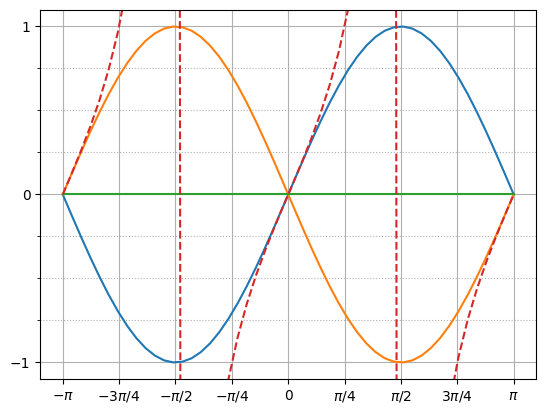

In [25]:
plt.figure()
plt.plot(xx2, yy_per1)
plt.plot(xx2, yy_per2)
plt.plot(xx2, yy_canc)
plt.plot(xx2, yy_tan, ls="--")


_ = plt.xticks(
    ticks=np.arange(-np.pi, np.pi + 0.1, np.pi / 4),
    labels=[
        r"$-\pi$",
        r"$-3\pi/4$",
        r"$-\pi/2$",
        r"$-\pi/4$",
        r"0",
        r"$\pi/4$",
        r"$\pi/2$",
        r"$3\pi/4$",
        "$\pi$",
    ],
)
_ = plt.yticks(ticks=np.arange(-1, 1.1, 1))
_ = plt.yticks(ticks=np.arange(-0.75, 0.76, 0.25), minor=True)
plt.grid()
plt.grid(which="minor", ls=":")
plt.ylim(-1.1, 1.1)

Note que, na função tangente, quando ela transiciona de positivo para negativo, uma linha foi traçada em nosso gráfico. Esse é sempre o comportamento de `plt.plot`. Se quiser remover essas linhas, a maneira mais simples é utilizando vários comandos de plotagem sequenciais.

No código a seguir, as *arrays* iniciais são cortadas em várias arrays (`np.array_split`) com base nos índices (`np.where` com 1 argumento só) onde o valor absoluto (`np.abs`) é maior que 5. Esse valor foi escolhido a dedo e representa o ponto onde "explodiu para fora da área de interesse". Depois de separar as *arrays*, podemos fazer um loop por elas e plotar os resultados.

```python
yy_tan_split = np.array_split(yy_tan, np.where(np.abs(np.diff(yy_tan)) > 5)[0])
xx_tan_split = np.array_split(xx2, np.where(np.abs(np.diff(yy_tan)) > 5)[0])
for xx, yy in zip(xx_tan_split, yy_tan_split):
    if len(xx) == 1: continue
    plt.plot(xx, yy, ls='--', c='C3')
```

(sec:basicos_np_2)=
## Básicos de `numpy` Parte 2

Agora que vimos alguns comandos básicos de plotagem, vamos continuar a explorar como criar e manipular *arrays*.

Eu mencionei que `numpy` não possui tipos iguais aos de Python. Para ilustrar isso, vamos ver como ele se comporta ao tentarmos criar uma *array* com um número inteiro grande demais. Para isso, temos que especificar o tipo do *array*, e fazemos isso com `dtype`.

Para um número inteiro de 32 bits, temos 2^32 valores diferentes. Tipicamente um dos bits é reservado para o sinal do número, restando 2^31 valores, mas isso não é necessário. Em `numpy`, temos os tipos `np.int32` que representa um número inteiro de 32 bits com sinal e `np.uint32` que representa um número inteiro sem sinal. O valor máximo de `np.int32` é 2147483647 ($2^31 - 1$, lembre-se que 0 também conta) e o valor mínimo é, previsivelmente, -2147483647. O valor máximo de `np.uint32` é 4294967295 e o mínimo é 0. Se aumentarmos o número para 64 bits, temos 2^64 valores, uma quantidade estupendamente maior.

Veja os seguintes exemplos. Primeiro mostro como podemos criar um *array* com esse valor máximo em `np.int32`, `np.int64` e `np.uint32`. Mas se tento criar um *array* com um número acima do máximo, temos um `OverflowError`.

In [26]:
int32_max = 2147483647
print(np.array([int32_max], dtype=np.int32))
print(np.array([int32_max], dtype=np.int64))
print(np.array([int32_max], dtype=np.uint32))
print(np.array([int32_max + 1], dtype=np.int64))
print(np.array([int32_max + 1], dtype=np.uint32))
print(np.array([int32_max + 1], dtype=np.int32))

[2147483647]
[2147483647]
[2147483647]
[2147483648]
[2147483648]


OverflowError: Python int too large to convert to C long

Aqui, *overflow* significa que os bits para a criação passaram do comprimento reservado. Para ilustrar isso, vamos imaginar um byte, com 8 bits, em seu valor máximo, `0b1111_1111`. Se adicionarmos 1, atingimos `0b1_0000_0000`, mas como temos somente 8 bits de armazenamento, esse `1` à esquerda é perdido e resta somente `0` (ocorreu *overflow*)[^5]

[^5]: O mesmo pode ocorrer no outro sentido, com números com sinal, mas neste caso é chamado de *underflow*

Podemos isso ocorrendo diretamente neste exemplo. Ao invés de criar o *array* com o *overflow*, podemos criar e depois causar o *overflow* sem causar o erro.

In [27]:
print(
    np.array([2147483647], dtype=np.int32) + 1,
    np.array([4294967295], dtype=np.uint32) + 1,
)

[-2147483648] [0]


Quando um *array* é criado a partir de uma lista com elementos mistos, `numpy` tenta converter todos os valores para o tipo mais abrangente.

In [28]:
np.array([1, 1.1])

array([1. , 1.1])

`1` foi convertido em um `float`.

In [29]:
np.array([1, 1.1, "2.2"])

array(['1', '1.1', '2.2'], dtype='<U32')

`1` e `1.1` foram convertidos em strings.